In [11]:
import pandas as pd

In [12]:
# Load the Excel file
file_path = 'ECOMM DATA.xlsx'
orders_df = pd.read_excel(file_path, sheet_name='Orders')

# Display the first few rows of the dataframe
print(orders_df.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [14]:
# Calculate total sales
total_sales = orders_df['Sales'].sum()
print(f"Total Sales: ${total_sales:.2f}")


Total Sales: $12642501.91


In [16]:
# Convert 'Order Date' to datetime format
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Extract year and month from the 'Order Date'
orders_df['Year'] = orders_df['Order Date'].dt.year
orders_df['Month'] = orders_df['Order Date'].dt.month

# Group by year and month and sum the sales
sales_trends = orders_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Display the sales trends
print(sales_trends)


    Year  Month         Sales
0   2011      1   98898.48886
1   2011      2   91152.15698
2   2011      3  145729.36736
3   2011      4  116915.76418
4   2011      5  146747.83610
5   2011      6  215207.38022
6   2011      7  115510.41912
7   2011      8  207581.49122
8   2011      9  290214.45534
9   2011     10  199071.26404
10  2011     11  298496.53752
11  2011     12  333925.73460
12  2012      1  135780.72024
13  2012      2  100510.21698
14  2012      3  163076.77116
15  2012      4  161052.26952
16  2012      5  208364.89124
17  2012      6  256175.69842
18  2012      7  145236.78512
19  2012      8  303142.94238
20  2012      9  289389.16564
21  2012     10  252939.85020
22  2012     11  323512.41690
23  2012     12  338256.96660
24  2013      1  199185.90738
25  2013      2  167239.65040
26  2013      3  198594.03012
27  2013      4  177821.31684
28  2013      5  260498.56470
29  2013      6  396519.61190
30  2013      7  229928.95200
31  2013      8  326488.78936
32  2013  

In [17]:
# Convert 'Order Date' to datetime format
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Extract year and month from the 'Order Date'
orders_df['Year'] = orders_df['Order Date'].dt.year
orders_df['Month'] = orders_df['Order Date'].dt.month

# Group by year and month and sum the sales
sales_trends = orders_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Display the sales trends
sales_trends.head()


,Year,Month,Sales
0,2011,1,98898.48886
1,2011,2,91152.15698
2,2011,3,145729.36736
3,2011,4,116915.76418
4,2011,5,146747.83610


In [19]:
# Group by product and sum the sales
best_selling_products = orders_df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort the products by sales in descending order
best_selling_products = best_selling_products.sort_values(by='Sales', ascending=False)

# Display the top 10 best-selling products
best_selling_products.head(10)


,Product Name,Sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...,...
2112,"KitchenAid Stove, Black",19549.8842
1885,"Hon Swivel Stool, Black",19536.6396
2012,"Ikea Library with Doors, Mobile",19259.0630
1231,"Eldon Lockers, Blue",19255.3236


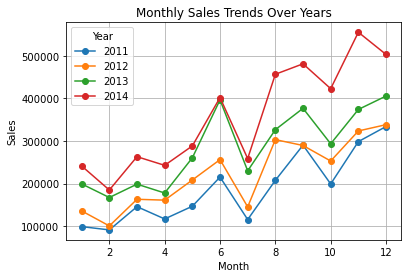

In [20]:
import matplotlib.pyplot as plt

# Create a pivot table for easier plotting
sales_trends_pivot = sales_trends.pivot(index='Month', columns='Year', values='Sales')

# Plot the sales trends
sales_trends_pivot.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()
